<a href="https://colab.research.google.com/github/Thiago89ml/CalificadorDeVino/blob/main/Vinos_Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('winequality-red.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
x = df[['citric acid','sulphates','alcohol']]

y= df[['quality']]

scaler = StandardScaler()

XScaled = scaler.fit_transform(x)

kn = KNeighborsClassifier(n_neighbors= 3)

kn.fit(XScaled,y)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

<function matplotlib.pyplot.show(close=None, block=None)>

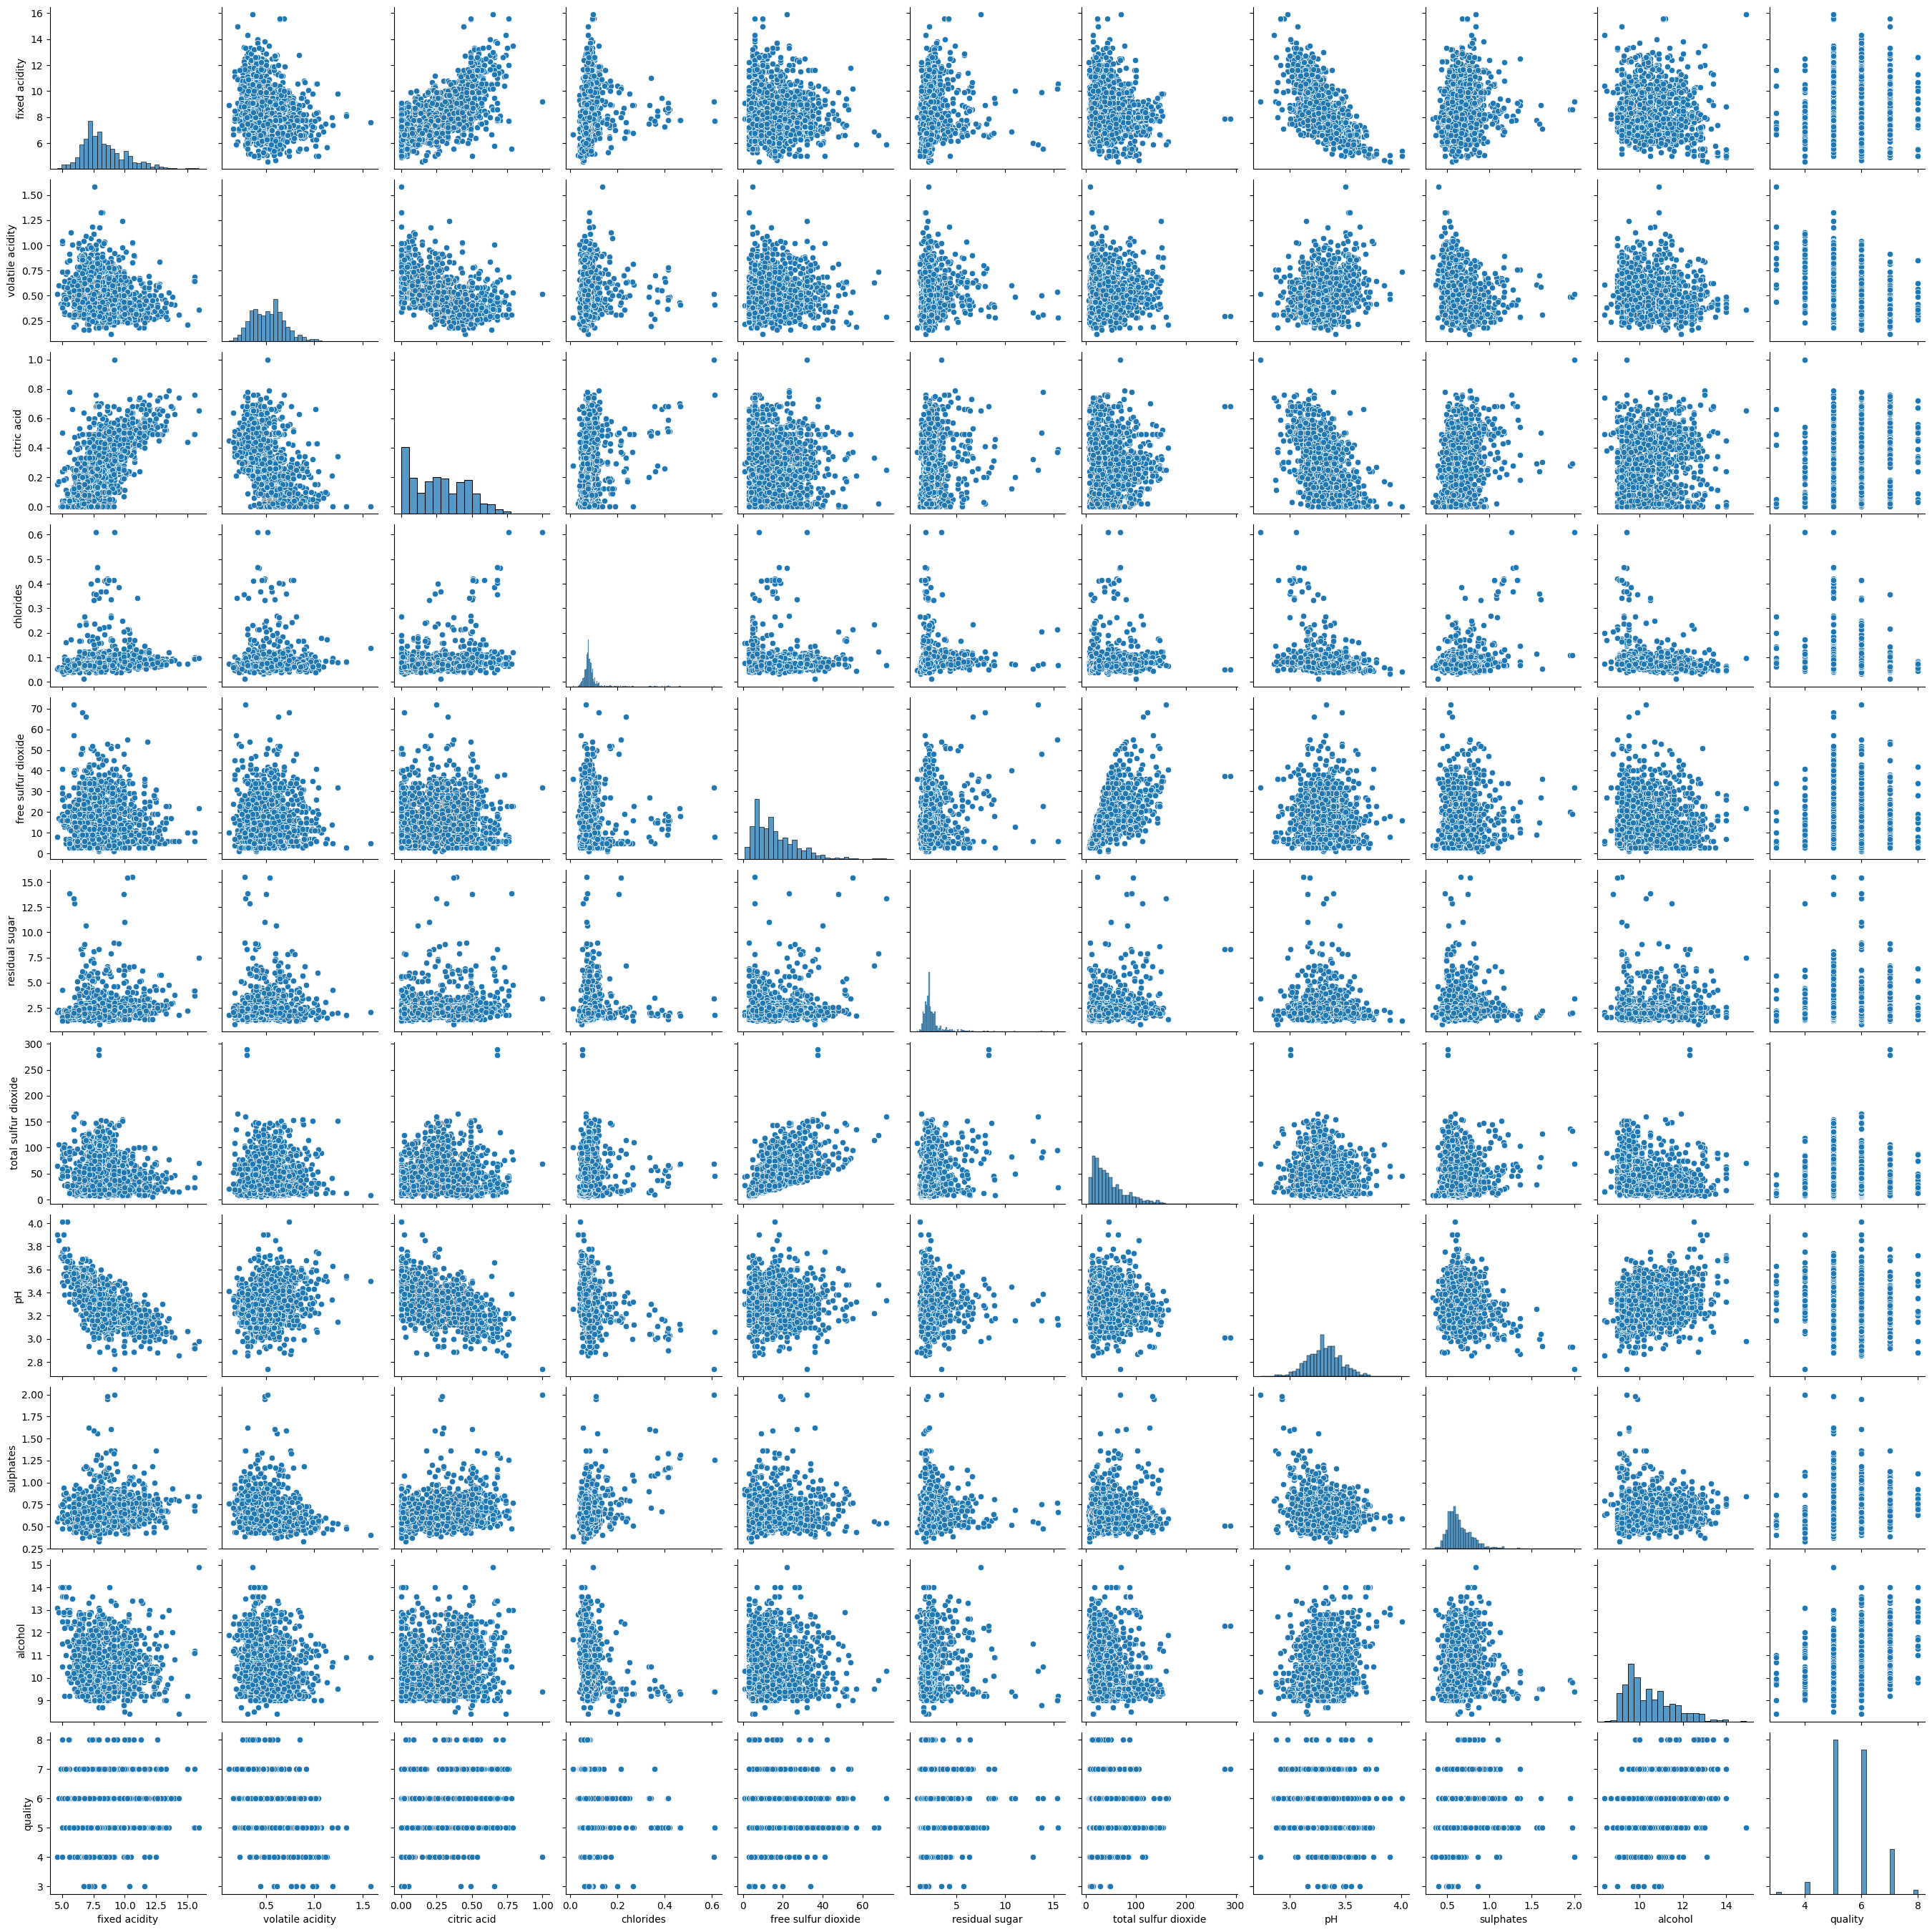

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','residual sugar','total sulfur dioxide','pH','sulphates','alcohol','quality']
sns.pairplot(df[cols])
plt.show



<Axes: >

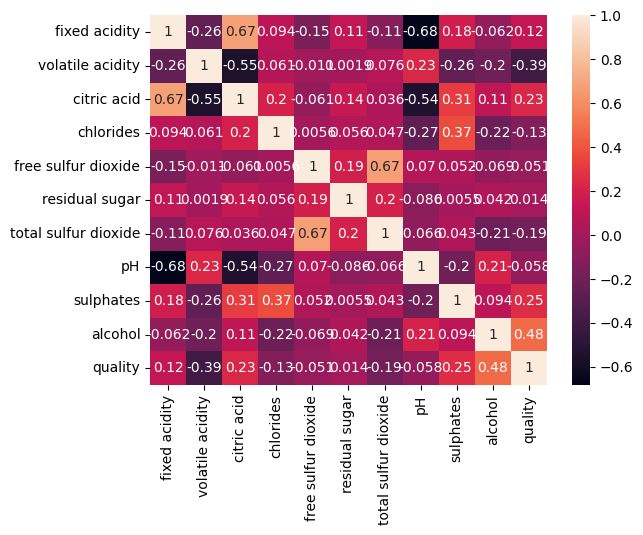

In [4]:
sns.heatmap(df[cols].corr(), annot = True)

In [27]:
# citric acid / sulphates / alcohol
input = [[0.90,0.80,10.0]]
inputScaler = scaler.transform(input)
output = kn.predict(inputScaler)

print("La calidad del vino es de: ", output[0])

La calidad del vino es de:  7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


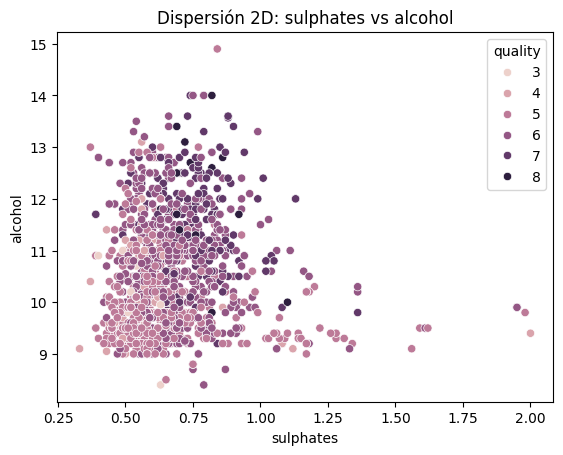

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb


plt.figure()
sb.scatterplot(
  data=df,
  x="sulphates",
  y="alcohol",
  hue="quality"
)
plt.title("Dispersión 2D: sulphates vs alcohol")
plt.xlabel("sulphates")
plt.ylabel("alcohol")
plt.legend(title="quality")
plt.show()

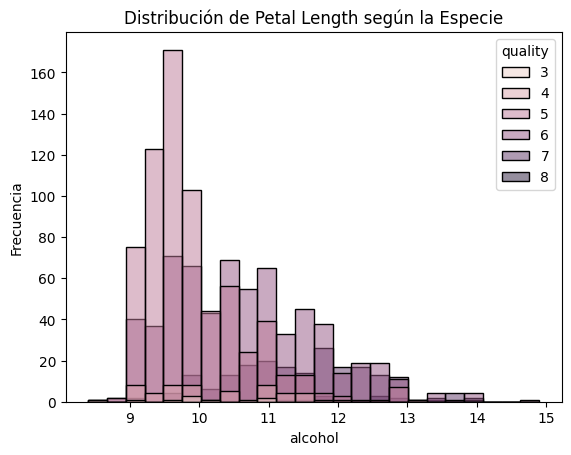

In [7]:
plt.figure()
sb.histplot(
  data=df,
  x="alcohol",
  hue="quality"
 )
plt.title("Distribución de Petal Length según la Especie")
plt.xlabel("alcohol")
plt.ylabel("Frecuencia")
plt.show()

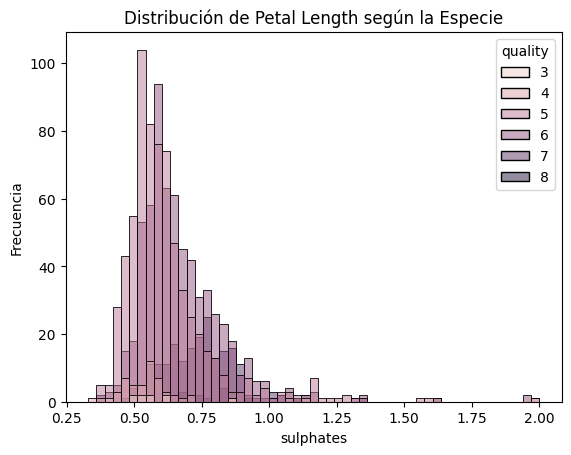

In [8]:
plt.figure()
sb.histplot(
  data=df,
  x="sulphates",
  hue="quality"
 )
plt.title("Distribución de Petal Length según la Especie")
plt.xlabel("sulphates")
plt.ylabel("Frecuencia")
plt.show()

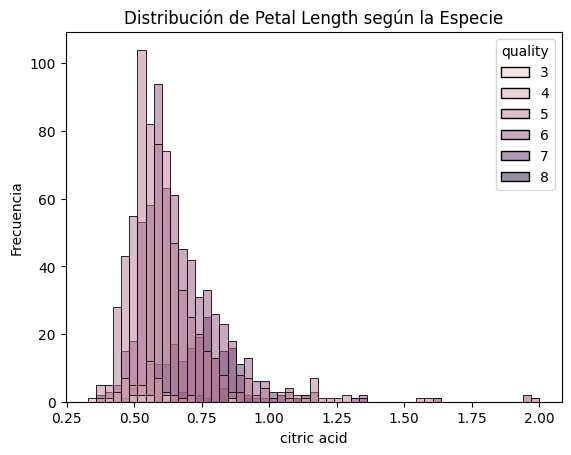

In [9]:
plt.figure()
sb.histplot(
  data=df,
  x="sulphates",
  hue="quality"
 )
plt.title("Distribución de Petal Length según la Especie")
plt.xlabel("citric acid")
plt.ylabel("Frecuencia")
plt.show()